# Competencia Kaggle
##Modelos y Simulación I Udea 2025-2

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


# Link para descarga directa desde kaggle:

**kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia**

# Se verifica instalacion de kaggle

In [2]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


# Se debe generar un token de la cuenta de kaggle en settings
se genera un archivo .json que se debe mover a la carpeta kaggle

In [3]:
!mv kaggle.json /root/.config/kaggle/kaggle.json

# Comprobación final del setting de kaggle
inhabilito la api key para que otros usuarios no la puedan ver

chmod 600 /root/.config/kaggle/kaggle.json

In [5]:
!chmod 600 /root/.config/kaggle/kaggle.json

In [6]:
!kaggle

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: the following arguments are required: command


###*queda comprobada la configuración de la API key que me generó kaggle*

# Paso 1. Ahora se indica que el servidor debe bajar de kaggle los datasets de la competencia

In [8]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.01GB/s]


###Pantallazo con la descarga del .zip

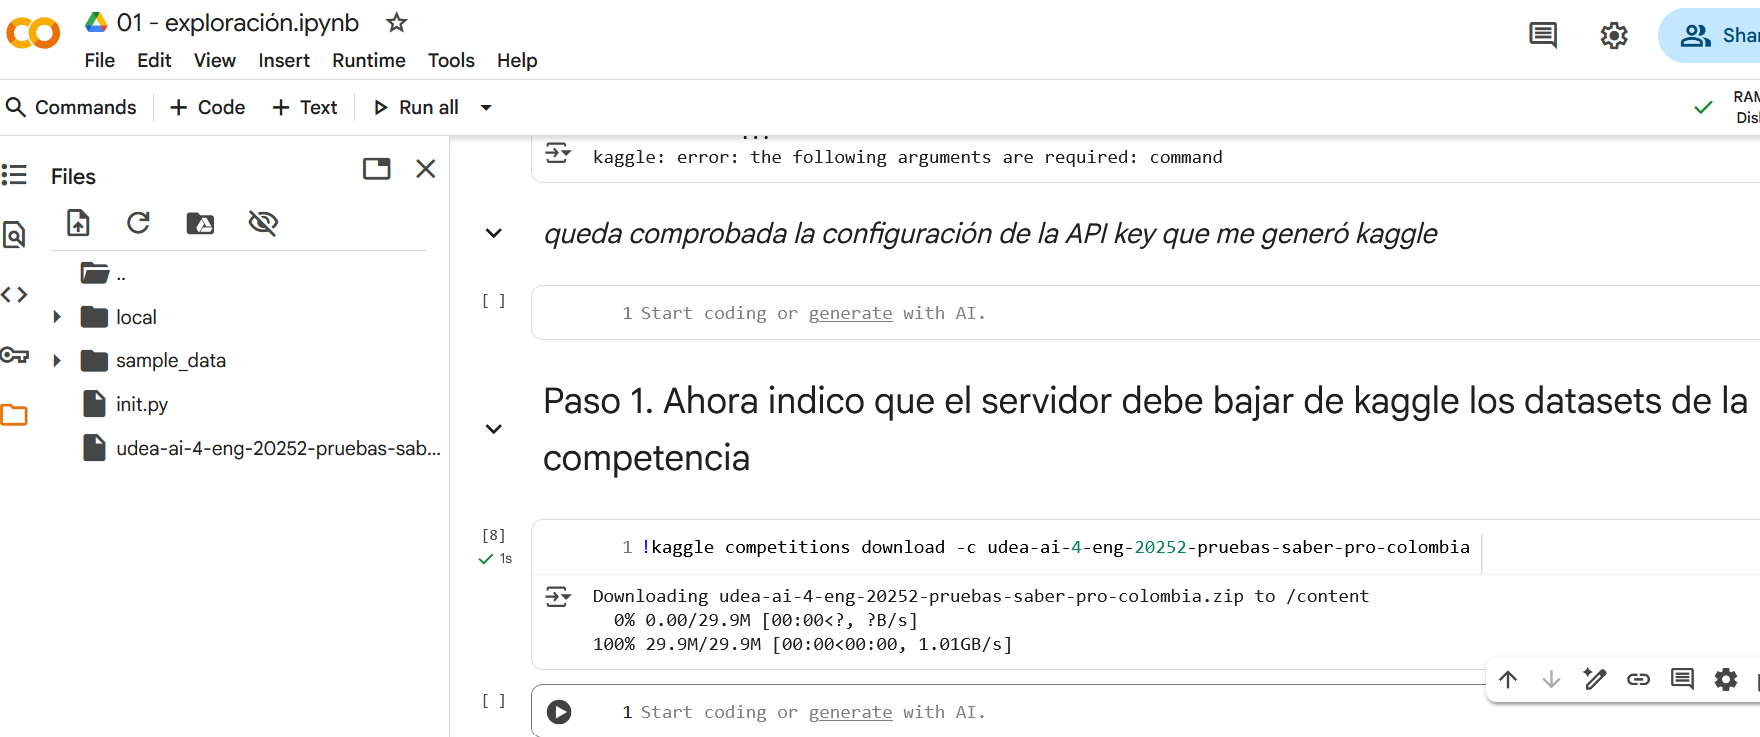

# Descomprimimos el archivo .zip

In [9]:
!unzip -l udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-09-16 01:46   submission_example.csv
 59185238  2025-09-16 01:46   test.csv
143732437  2025-09-16 01:46   train.csv
---------                     -------
207634348                     3 files


In [10]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [11]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Sep 16 01:46 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Sep 16 01:46 test.csv
138M -rw-r--r-- 1 root root 138M Sep 16 01:46 train.csv


#Trabajando con los csv
Ahora que los archivos csv de la competencia ya se encuentran disponibles los podemos cargar con pandas para empezar a trabajar.

# Trabajamos con el archivo de **train.csv**

In [12]:
import pandas as pd

In [13]:
train=pd.read_csv('train.csv')

In [15]:
train.shape

(692500, 21)

In [16]:
train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [18]:
train.dtypes
#Verificamos tipos de datos

,0
ID,int64
PERIODO_ACADEMICO,int64
E_PRGM_ACADEMICO,object
E_PRGM_DEPARTAMENTO,object
E_VALORMATRICULAUNIVERSIDAD,object
E_HORASSEMANATRABAJA,object
F_ESTRATOVIVIENDA,object
F_TIENEINTERNET,object
F_EDUCACIONPADRE,object
F_TIENELAVADORA,object


In [19]:
train.isnull().sum()
#Verificamos valores nulos

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


#Se analizan los estratos socioeconomicos de los estudiantes

In [20]:
train["F_ESTRATOVIVIENDA"].describe()

,F_ESTRATOVIVIENDA
count,660363
unique,7
top,Estrato 2
freq,232671


Esta columna en el data set muestra que hay 7 estratos socioeconomicos, donde el mas frecuente es el estrato 2 con 232671 estudiantes

In [21]:
train["F_ESTRATOVIVIENDA"].value_counts()

,count
F_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


Esta tabla muestra el número de estudiantes por cada estrato socio economico, en la columna hay algunos datos indicados como "Sin Estrato"

<Axes: xlabel='F_ESTRATOVIVIENDA'>

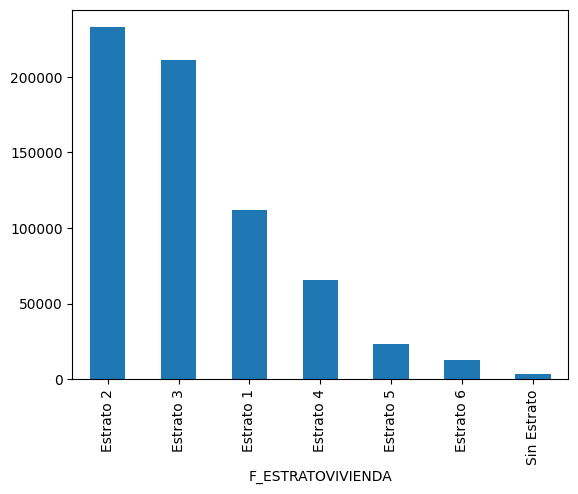

In [24]:
train["F_ESTRATOVIVIENDA"].value_counts().plot(kind='bar')

Se analiza además un diagrama de cajas y bigotes para el caso del indicador 1

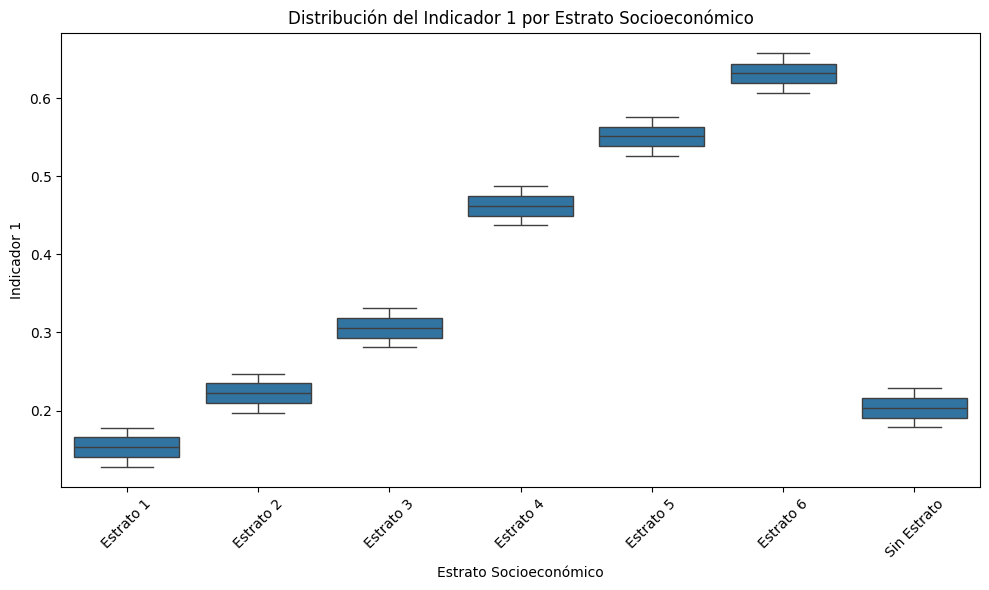

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
order = ['Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato']
sns.boxplot(x='F_ESTRATOVIVIENDA', y='INDICADOR_1', data=train, order=order)
plt.title('Distribución del Indicador 1 por Estrato Socioeconómico')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Indicador 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()